# Lab 10

_[General notebook information](https://computing-in-context.afeld.me/notebooks.html)_

We are going to look at the population count of different community districts over time.

In [1]:
import pandas as pd
import plotly.express as px

url = 'https://data.cityofnewyork.us/resource/h9gi-nx95.csv'
crash_data = pd.read_csv(url)
crash_data.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29T00:00:00.000,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11T00:00:00.000,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"\n, \n(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14T00:00:00.000,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"\n, \n(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [3]:
print(crash_data.columns)

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'off_street_name',
       'cross_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')


In [5]:
cleaned_data = crash_data[["contributing_factor_vehicle_1"]].dropna()
cleaned_data.head()

,contributing_factor_vehicle_1
0,Aggressive Driving/Road Rage
1,Pavement Slippery
2,Following Too Closely
3,Unspecified
5,Unspecified


In [7]:
crash_data.describe()

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
count,632.000000,924.000000,924.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1.000000e+03
mean,10907.625000,40.413002,-73.360506,0.454000,0.004000,0.074000,0.003000,0.038000,0.0,0.333000,0.001000,4.440555e+06
std,516.926995,3.533802,6.413563,0.786449,0.063151,0.265696,0.054717,0.191292,0.0,0.768571,0.031623,4.151893e+04
min,10001.000000,0.000000,-74.200980,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.136992e+06
25%,10459.000000,40.660920,-73.966905,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.407764e+06
50%,11209.000000,40.708324,-73.927270,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.408298e+06
75%,11236.000000,40.783232,-73.872460,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.456829e+06
max,11692.000000,40.905174,0.000000,7.000000,1.000000,2.000000,1.000000,1.000000,0.0,7.000000,1.000000,4.545699e+06


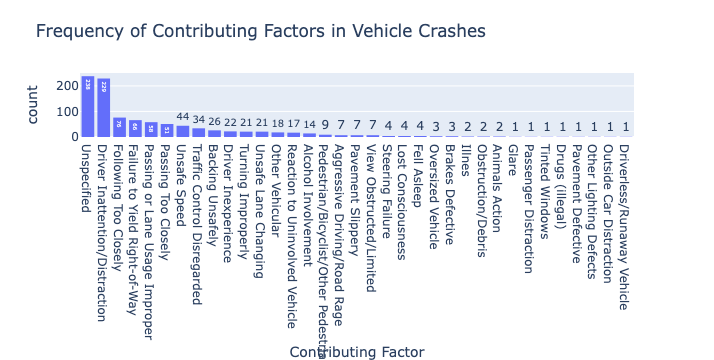

In [17]:
fig = px.histogram(
    cleaned_data, 
    x = "contributing_factor_vehicle_1",
    title="Frequency of Contributing Factors in Vehicle Crashes",
    labels = {"contributing_factor_vehicle_1": "Contributing Factor"},
    text_auto = True,)

fig.update_layout(
    xaxis = {'categoryorder':'total descending'}, # sort by frequency
    bargap = 0.2
    )
fig.show()

In [21]:
url = 'https://data.cityofnewyork.us/resource/k397-673e.csv?$query=SELECT%0A%20%20%60fiscal_year%60%2C%0A%20%20%60payroll_number%60%2C%0A%20%20%60agency_name%60%2C%0A%20%20%60last_name%60%2C%0A%20%20%60first_name%60%2C%0A%20%20%60mid_init%60%2C%0A%20%20%60agency_start_date%60%2C%0A%20%20%60work_location_borough%60%2C%0A%20%20%60title_description%60%2C%0A%20%20%60leave_status_as_of_june_30%60%2C%0A%20%20%60base_salary%60%2C%0A%20%20%60pay_basis%60%2C%0A%20%20%60regular_hours%60%2C%0A%20%20%60regular_gross_paid%60%2C%0A%20%20%60ot_hours%60%2C%0A%20%20%60total_ot_paid%60%2C%0A%20%20%60total_other_pay%60%0AORDER%20BY%20%60agency_name%60%20ASC%20NULL%20LAST%2C%20%60fiscal_year%60%20DESC%20NULL%20FIRST'

pay = pd.read_csv(url)
pay.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2024,67,ADMIN FOR CHILDREN'S SVCS,VIRUET,ADAM,X,2023-06-26T00:00:00.000,MANHATTAN,YOUTH DEVELOPMENT SPECIALIST,CEASED,50001.0,per Annum,64.0,1784.86,0.00,0.00,28.28
1,2024,67,ADMIN FOR CHILDREN'S SVCS,SCATURRO,DANIELLE,C,2023-10-23T00:00:00.000,MANHATTAN,COMMUNITY ASSOCIATE,ACTIVE,49615.0,per Annum,1190.0,31297.37,0.00,0.00,115.50
2,2024,67,ADMIN FOR CHILDREN'S SVCS,TAYLOR,MICHELE,NaN,2007-02-19T00:00:00.000,MANHATTAN,ADM MANAGER-NON-MGRL,CEASED,83568.0,per Annum,0.0,737.95,0.00,0.00,6.89
3,2024,67,ADMIN FOR CHILDREN'S SVCS,BERRY,MARIA,E,2023-11-20T00:00:00.000,QUEENS,CHILD PROTECTIVE SPECIALIST,ACTIVE,62043.0,per Annum,1050.0,31823.10,106.25,3969.23,27.88
4,2024,67,ADMIN FOR CHILDREN'S SVCS,AKINSULIRE,OLUWATOYIN,G,2023-11-20T00:00:00.000,QUEENS,CHILD PROTECTIVE SPECIALIST,CEASED,55463.0,per Annum,805.0,24397.34,44.00,1548.23,62.14


In [27]:
pay.info()

# we see that mid init has nulls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fiscal_year                 1000 non-null   int64  
 1   payroll_number              1000 non-null   int64  
 2   agency_name                 1000 non-null   object 
 3   last_name                   1000 non-null   object 
 4   first_name                  1000 non-null   object 
 5   mid_init                    724 non-null    object 
 6   agency_start_date           1000 non-null   object 
 7   work_location_borough       1000 non-null   object 
 8   title_description           1000 non-null   object 
 9   leave_status_as_of_june_30  1000 non-null   object 
 10  base_salary                 1000 non-null   float64
 11  pay_basis                   1000 non-null   object 
 12  regular_hours               1000 non-null   float64
 13  regular_gross_paid          1000 n

In [29]:
pay.describe()

,fiscal_year,payroll_number,base_salary,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
count,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024.0,67.0,67179.737160,876.755140,33700.216410,33.888460,1343.928860,36.415820
std,0.0,0.0,20245.057219,707.420724,33817.532662,84.680374,4059.917968,34.911683
min,2024.0,67.0,27.160000,-144.000000,-3386.390000,-6.000000,-658.470000,0.000000
25%,2024.0,67.0,56300.000000,210.000000,5976.155000,0.000000,0.000000,6.415000
50%,2024.0,67.0,62043.000000,630.000000,17525.325000,4.500000,167.335000,25.895000
75%,2024.0,67.0,75193.000000,1750.000000,55868.687500,34.750000,1227.885000,59.435000
max,2024.0,67.0,167699.000000,2080.000000,153557.310000,1921.250000,103509.950000,115.500000


In [41]:
pay_clean = pay[["base_salary", "total_other_pay", "fiscal_year"]]

pay_clean.head()

# if you put single bracket: you are indexing 

,base_salary,total_other_pay,fiscal_year
0,50001.0,28.28,2024
1,49615.0,115.50,2024
2,83568.0,6.89,2024
3,62043.0,27.88,2024
4,55463.0,62.14,2024


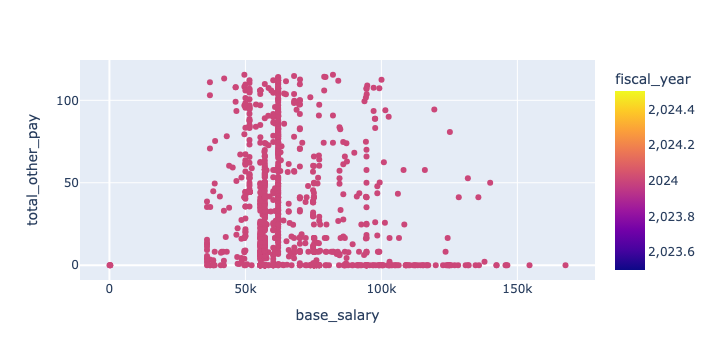

In [43]:
fig2 = px.scatter(
    pay_clean,
    x = "base_salary",
    y = "total_other_pay",
    color = "fiscal_year"
)

fig2.show()

## Step 0

Read the data from the [New York City Population By Community Districts](https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Community-Districts/xi7c-iiu2/data) data set into a DataFrame called `pop_by_cd`. To get the URL:

1. Visit the page linked above.
1. Click `Export`.
1. Right-click `CSV`.
1. Click `Copy Link Address` (or `Location`, depending on your browser).

In [151]:
url = 'https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD'
pop_by_cd = pd.read_csv(url)

pop_by_cd.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


## Step 1

Prepare the data. Use the following code to [reshape](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#melt-and-wide-to-long) the DataFrame to have one row per community district per Census year.

In [154]:
# turn the population columns into rows
populations = pd.melt(
    pop_by_cd,
    id_vars=["Borough", "CD Number", "CD Name"],
    var_name="year",
    value_name="population",
)

# turn the years into numbers
populations.year = populations.year.str.replace(" Population", "").astype(int)

populations

,Borough,CD Number,CD Name,year,population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",1970,138557
1,Bronx,2,"Hunts Point, Longwood",1970,99493
2,Bronx,3,"Morrisania, Crotona Park East",1970,150636
3,Bronx,4,"Highbridge, Concourse Village",1970,144207
4,Bronx,5,"University Hts., Fordham, Mt. Hope",1970,121807
...,...,...,...,...,...
290,Queens,13,"Queens Village, Rosedale",2010,188593
291,Queens,14,"The Rockaways, Broad Channel",2010,114978
292,Staten Island,1,"Stapleton, Port Richmond",2010,175756
293,Staten Island,2,"New Springville, South Beach",2010,132003


## Step 2

Create a line chart of the population over time for each community district in Manhattan. There should be [one line for each](https://plotly.com/python/line-charts/#Line-Plots-with-column-encoding-color).

In [159]:
manhattan = populations[populations["Borough"] == "Manhattan"]
manhattan.head()

,Borough,CD Number,CD Name,year,population
30,Manhattan,1,"Battery Park City, Tribeca",1970,7706
31,Manhattan,2,"Greenwich Village, Soho",1970,84337
32,Manhattan,3,"Lower East Side, Chinatown",1970,181845
33,Manhattan,4,"Chelsea, Clinton",1970,83601
34,Manhattan,5,Midtown Business District,1970,31076


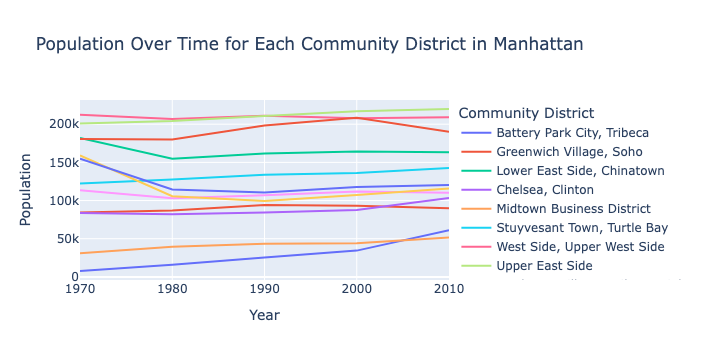

In [161]:
# your code here
fig3 = px.line(
    manhattan,
    x = "year",
    y = "population",
    color = "CD Name",
    title = "Population Over Time for Each Community District in Manhattan",
    labels = {"year":"Year", "population":"Population", "CD Name": "Community District"}
)


fig3.show()

## Step 3

Starting with the same dataset, create a line chart of the population over time for each Borough. There should be one line for each.

In [164]:
city_pop = populations.groupby(["Borough", "year"],as_index= False)['population'].sum() 

city_pop.head()


,Borough,year,population
0,Bronx,1970,1478524
1,Bronx,1980,1170349
2,Bronx,1990,1197420
3,Bronx,2000,1327454
4,Bronx,2010,1380697


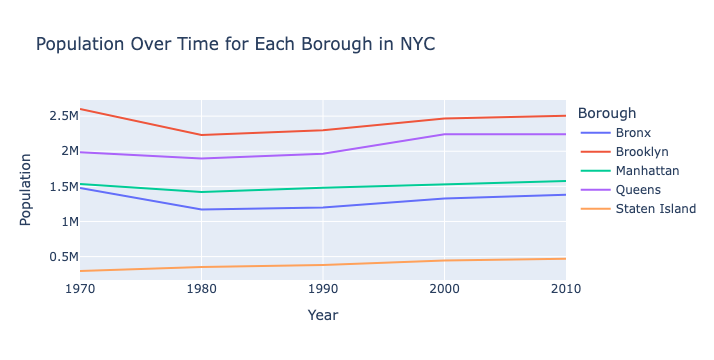

In [166]:
fig4 = px.line(
    city_pop,
    x = "year",
    y = "population",
    color = "Borough",
    title = "Population Over Time for Each Borough in NYC",
    labels = {"year":"Year", "population":"Population", }
)


fig4.show()

## Step 4

Submit via Gradescope.